In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("TravelInsurancePrediction.csv")
data.head()

,Unnamed: 0,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


#### EDA

In [3]:
data.shape

(1987, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment_Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
data.columns

Index(['Unnamed: 0', 'Age', 'Employment_Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
data.isna().sum()

Unnamed: 0             0
Age                    0
Employment_Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

* No Missing values

In [8]:
data = data.drop('Unnamed: 0', axis = 1)

In [9]:
data.Employment_Type.value_counts()

Employment_Type
Private Sector/Self Employed    1417
Government Sector                570
Name: count, dtype: int64

In [10]:
data['TravelInsurance'].value_counts()

TravelInsurance
0    1277
1     710
Name: count, dtype: int64

<Axes: title={'center': 'Label count of the dataset'}, xlabel='TravelInsurance', ylabel='count'>

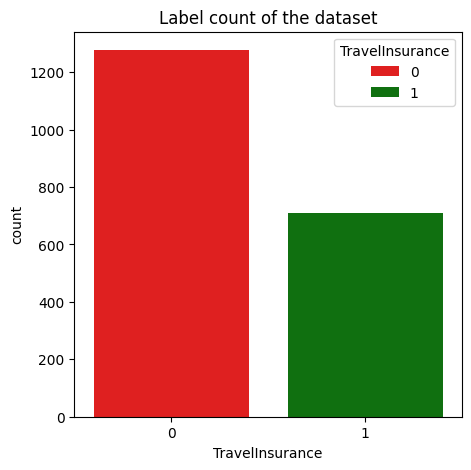

In [11]:
plt.figure(figsize = (5,5))
plt.title('Label count of the dataset')
sns.countplot(data = data, x = 'TravelInsurance', hue='TravelInsurance',palette=["red","green"])

* About 700 peoples taken insurance out of 1987

<Axes: title={'center': 'Histogram of Age'}, xlabel='Age', ylabel='Count'>

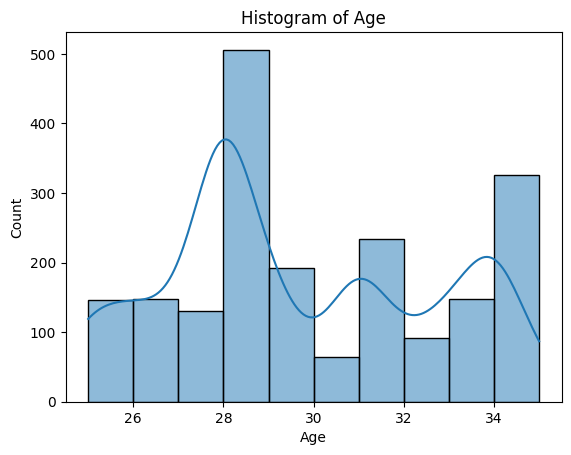

In [12]:
plt.title('Histogram of Age')
sns.histplot(data = data, x= 'Age', bins = 10, kde = True)

<Axes: title={'center': 'Age by Travel Insurance purchased'}, xlabel='Age', ylabel='count'>

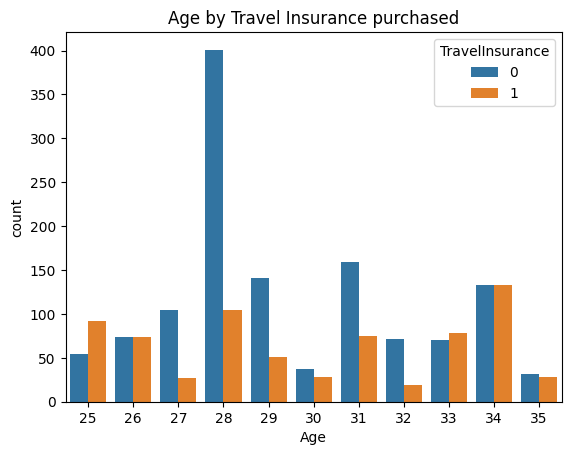

In [13]:
plt.title('Age by Travel Insurance purchased')
sns.countplot(data = data , x= 'Age', hue='TravelInsurance')

* 1.In Age 34,people purchased and non purchase insurance is balanced and most of people purchased also in age 34

* 2.Minimum purchase count in the Age 32

* 3.In the age 28,majority of people not purchased

<Axes: title={'center': 'Employment Type by Travel Insurance purchased'}, xlabel='Employment_Type', ylabel='count'>

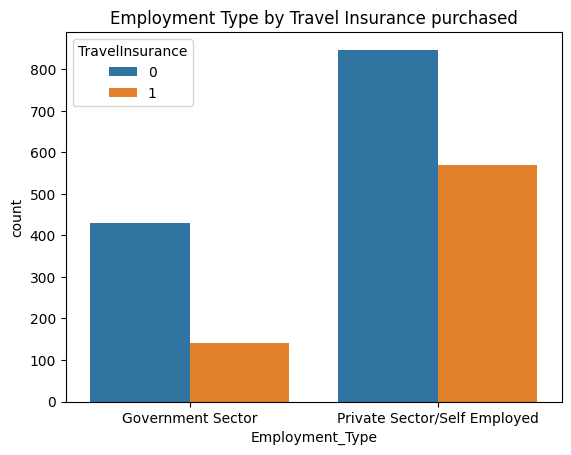

In [14]:
plt.title('Employment Type by Travel Insurance purchased')
sns.countplot(data = data, x = 'Employment_Type', hue = 'TravelInsurance')

* Private Sector/ Self Employed purchased more than Government Sector Employees

<Axes: title={'center': 'Graduate by Travel Insurance purchased'}, xlabel='GraduateOrNot', ylabel='count'>

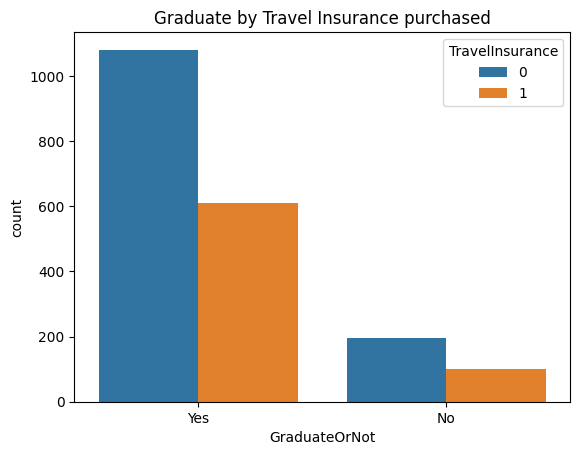

In [15]:
plt.title('Graduate by Travel Insurance purchased')
sns.countplot(data = data, x='GraduateOrNot', hue='TravelInsurance')

* 1.Graduate people purchase more than non graduate

* 2.Most People who didn't purchased are also graduate

<Axes: title={'center': 'Annual Income vs age by Travel Insurance Purchased'}, xlabel='AnnualIncome', ylabel='Age'>

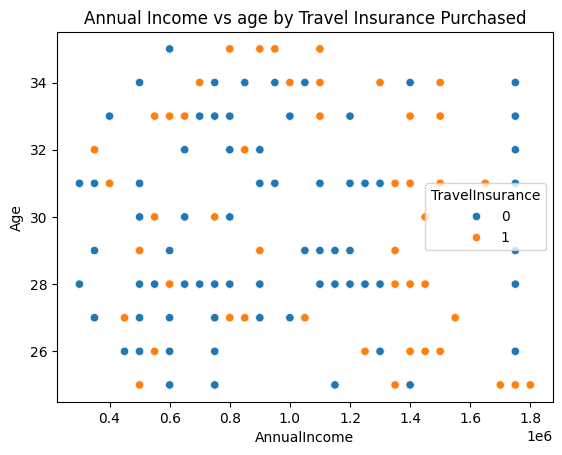

In [16]:
plt.title('Annual Income vs age by Travel Insurance Purchased')
sns.scatterplot(data = data, x = 'AnnualIncome', y='Age', hue='TravelInsurance')

* Majority of people who purchased are above Age 30

<Axes: title={'center': 'Family Members by Travel Insurance purchased'}, xlabel='FamilyMembers', ylabel='count'>

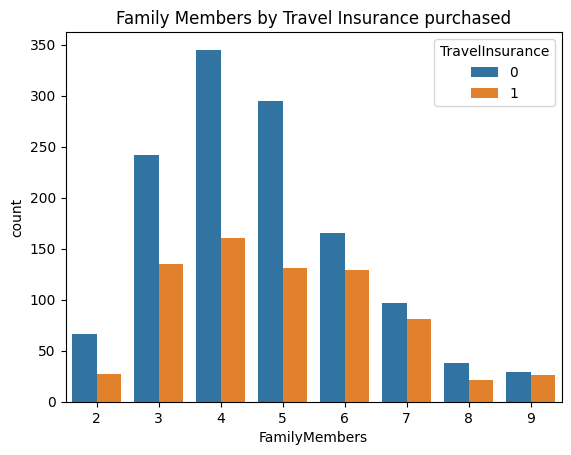

In [17]:
plt.title('Family Members by Travel Insurance purchased')
sns.countplot(data = data, x='FamilyMembers', hue= 'TravelInsurance')

* Family with 4 members purchased more and family having 8 members purchased less

<Axes: title={'center': 'Chronic Diseases by Travel Insurance purchased'}, xlabel='ChronicDiseases', ylabel='count'>

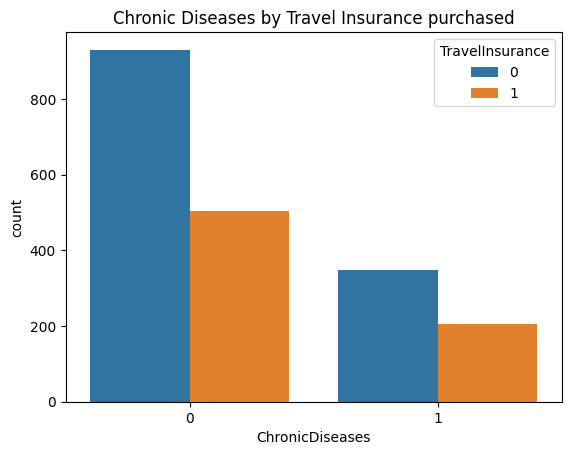

In [18]:
plt.title('Chronic Diseases by Travel Insurance purchased')
sns.countplot(data = data, x= 'ChronicDiseases', hue = 'TravelInsurance')

* People with No Chronic disease purchased more

<Axes: title={'center': 'Frequent Flyer by Travel Insurance purchased'}, xlabel='FrequentFlyer', ylabel='count'>

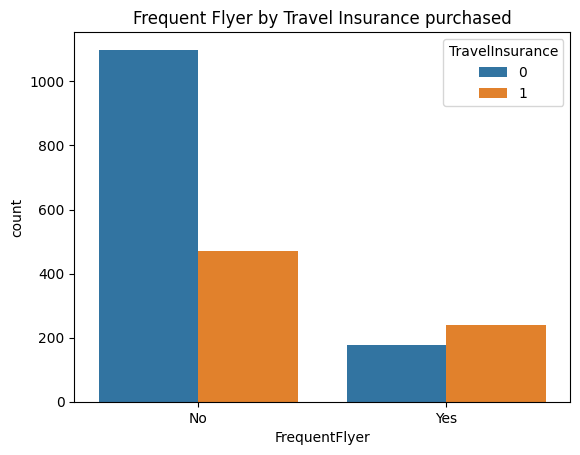

In [19]:
plt.title('Frequent Flyer by Travel Insurance purchased')
sns.countplot(data=data, x='FrequentFlyer', hue='TravelInsurance')

* Non Frequent flyers purchased more than frequent flyers

* In Frequent flyers majority of them purchased

<Axes: title={'center': 'Ever Travelled Abroad by Travel Insurance purchased'}, xlabel='EverTravelledAbroad', ylabel='count'>

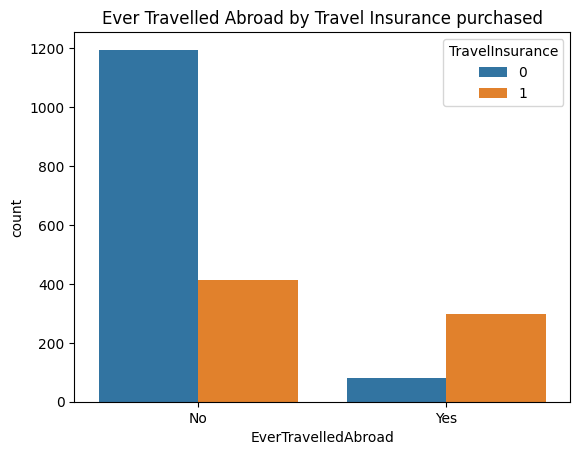

In [20]:
plt.title('Ever Travelled Abroad by Travel Insurance purchased')
sns.countplot(data=data, x='EverTravelledAbroad', hue='TravelInsurance')

* Majority of the people who never been to aboroad havent purchased

* Majority of the People who ever traveled abroad has purchased

Text(0.5, 0, 'AnnualIncome in 10^6')

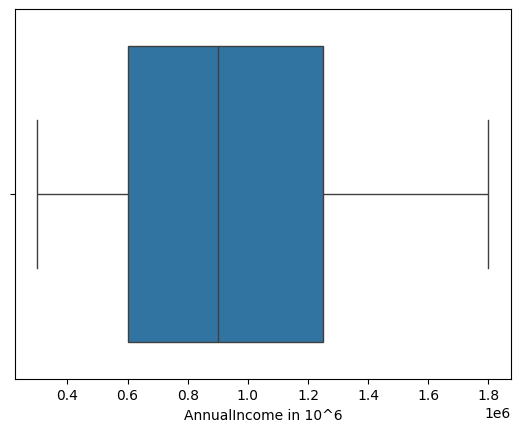

In [21]:
sns.boxplot(data= data, x='AnnualIncome')
plt.xlabel('AnnualIncome in 10^6')

In [22]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index
numcols = numcols[numcols != 'TravelInsurance']

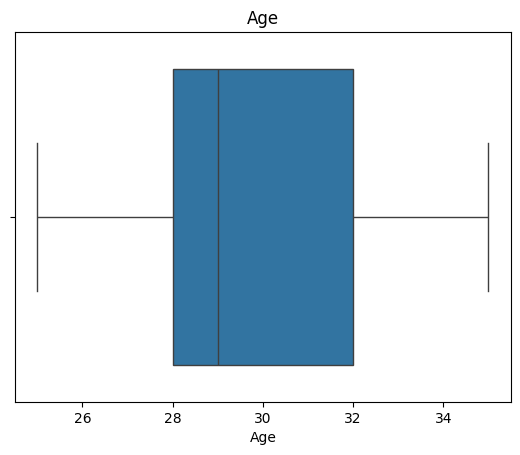

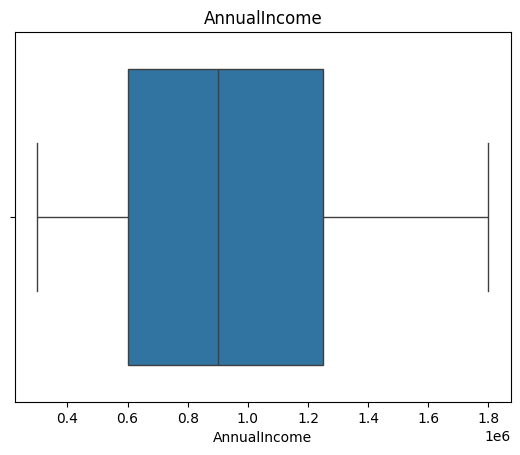

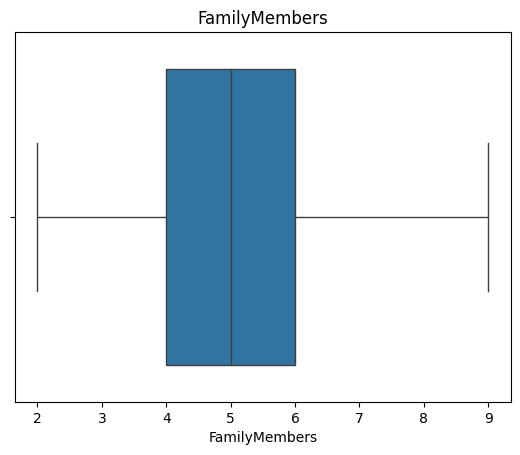

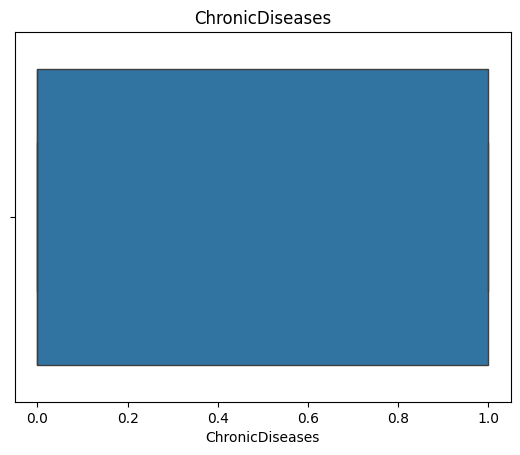

In [23]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

* No outliers

<Axes: >

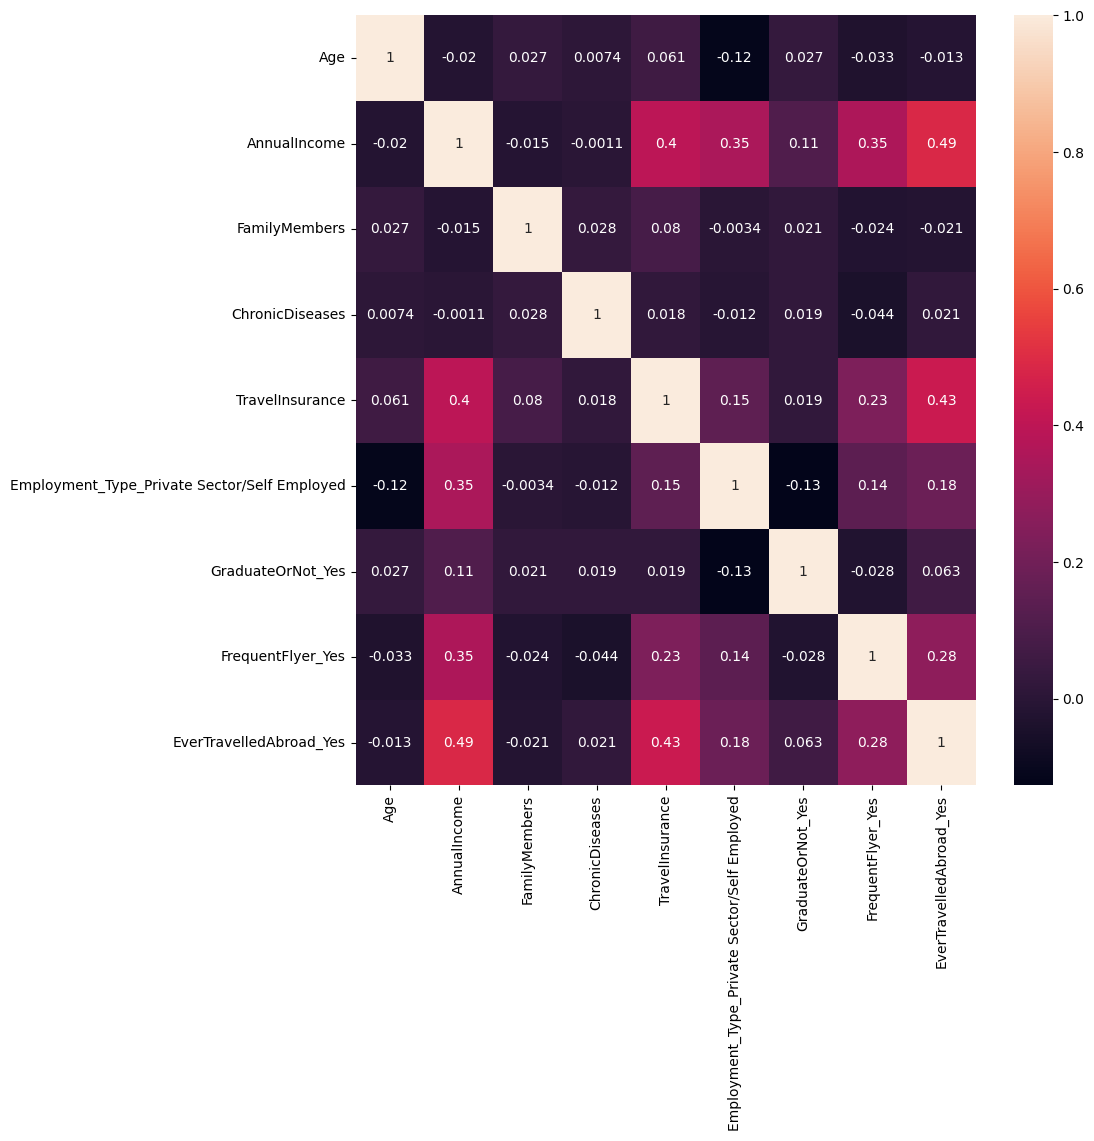

In [24]:
plt.figure(figsize = (10, 10))
sns.heatmap(data = pd.get_dummies(data, drop_first=True).corr(), annot = True)

* We can see, Travel Insurance purchase is highly correlated to EverTravelledAbroad, AnnualIncome, FrequentFlyer and Employment Type

In [25]:
from sklearn.preprocessing import LabelEncoder
lc= LabelEncoder()

data.Employment_Type = lc.fit_transform(data.Employment_Type)
data.GraduateOrNot = lc.fit_transform(data.GraduateOrNot)
data.FrequentFlyer=lc.fit_transform(data.FrequentFlyer)
data.EverTravelledAbroad=lc.fit_transform(data.EverTravelledAbroad)

In [26]:
data

,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


### Modeling

In [27]:
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

In [28]:
#Train Test Split
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [29]:
X_train.shape,X_test.shape

((1490, 8), (497, 8))

In [30]:
## Feature Selection based on correlaltion
X_train.corr()

,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
Age,1.000000,-0.138635,0.033107,-0.025645,0.033892,-0.016967,-0.030828,-0.039279
Employment_Type,-0.138635,1.000000,-0.137050,0.336879,-0.034153,-0.021439,0.138057,0.174755
GraduateOrNot,0.033107,-0.137050,1.000000,0.100749,0.024821,0.017572,-0.044639,0.075795
AnnualIncome,-0.025645,0.336879,0.100749,1.000000,-0.031068,-0.001910,0.349066,0.497434
FamilyMembers,0.033892,-0.034153,0.024821,-0.031068,1.000000,0.006782,-0.010754,-0.058726
ChronicDiseases,-0.016967,-0.021439,0.017572,-0.001910,0.006782,1.000000,-0.028947,0.034363
FrequentFlyer,-0.030828,0.138057,-0.044639,0.349066,-0.010754,-0.028947,1.000000,0.289226
EverTravelledAbroad,-0.039279,0.174755,0.075795,0.497434,-0.058726,0.034363,0.289226,1.000000


<Axes: >

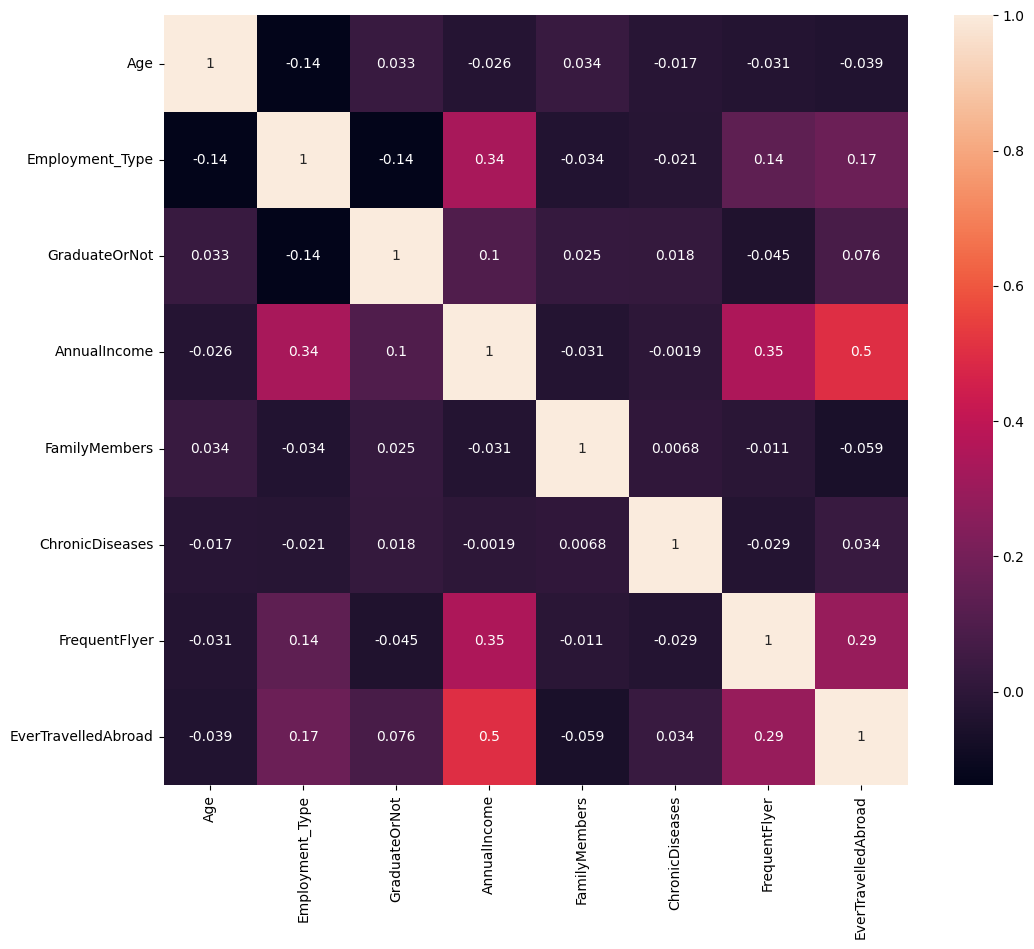

In [31]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [32]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
logreg = LogisticRegression(max_iter=1000)

In [34]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred_logreg = logreg.predict(X_test)

In [36]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.6458752515090543
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.78       321
           1       0.00      0.00      0.00       176

    accuracy                           0.65       497
   macro avg       0.32      0.50      0.39       497
weighted avg       0.42      0.65      0.51       497



F:\DATA SCIENCE\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\DATA SCIENCE\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\DATA SCIENCE\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


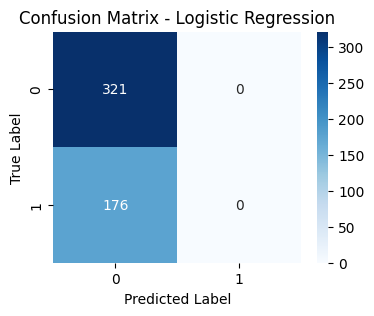

In [37]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [38]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred_dt = decision_tree.predict(X_test)

In [40]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7847082494969819
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       321
           1       0.73      0.62      0.67       176

    accuracy                           0.78       497
   macro avg       0.77      0.75      0.76       497
weighted avg       0.78      0.78      0.78       497



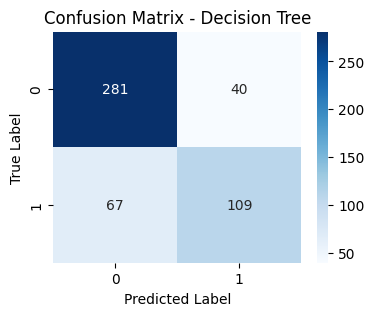

In [41]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rf = random_forest.predict(X_test)

In [44]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.806841046277666
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       321
           1       0.78      0.63      0.70       176

    accuracy                           0.81       497
   macro avg       0.80      0.77      0.78       497
weighted avg       0.80      0.81      0.80       497



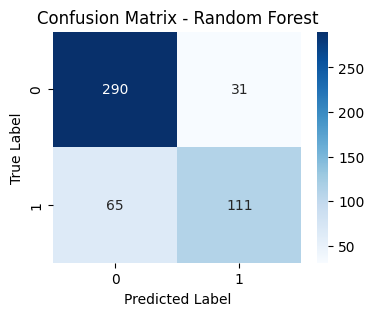

In [45]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [46]:
#Support Vector Machine 
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [47]:
y_pred_svm = svm.predict(X_test)

In [48]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7847082494969819
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       321
           1       0.84      0.48      0.61       176

    accuracy                           0.78       497
   macro avg       0.81      0.72      0.73       497
weighted avg       0.80      0.78      0.77       497



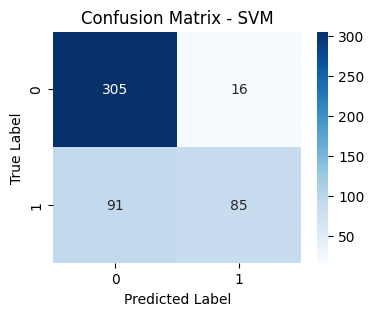

In [49]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

* from this we can see Random forest classifier has more accuracy so we can take it as our best fit model

In [50]:
cross_val_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores for 5 Folds:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores for 5 Folds: [0.80201342 0.75167785 0.73489933 0.79194631 0.79865772]
Average Cross-Validation Score: 0.7758389261744967
